# Functions That we use frequently

importing libraries we are going to need :

In [1]:
import skimage.io as iio
import numpy as np
import matplotlib.pyplot as plt

### Image Reading

In [2]:
im=iio.imread('cat_grayscale.jpg',as_gray=True)
print(im.shape)

(500, 750)


### Image Display

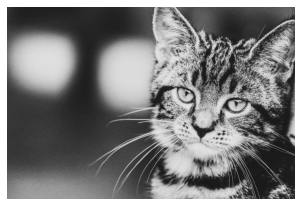

In [3]:
def make_image(data, size=(4, 4), dpi=100):
    fig = plt.figure()
    fig.set_size_inches(size)
    ax = plt.Axes(fig, [0., 0., 1., 1.])
    ax.set_axis_off()
    fig.add_axes(ax)
    plt.set_cmap('gray')
    ax.imshow(data, aspect='equal')
make_image(im)

### Rectangular mask creating function

In [4]:
def mask(im, x1, x2 , y1 , y2):
    shape= im.shape
    new = np.ones((shape[0],shape[1]), dtype=int)
    for i in range(y1,y2):
        for j in range(x1,x2):
            new[i,j]=0
    return new


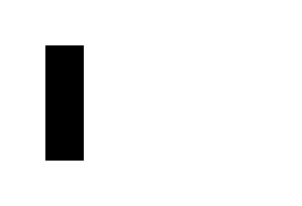

In [5]:
make_image(mask(im, 100, 200 , 100 , 400))

In [6]:
def delete_zone(im,mask):
    return im*mask

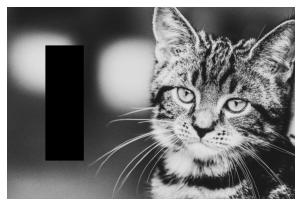

In [7]:
make_image(delete_zone(im,mask(im, 100, 200 , 100 , 400)))